# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# set figure properties
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available'].copy()
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

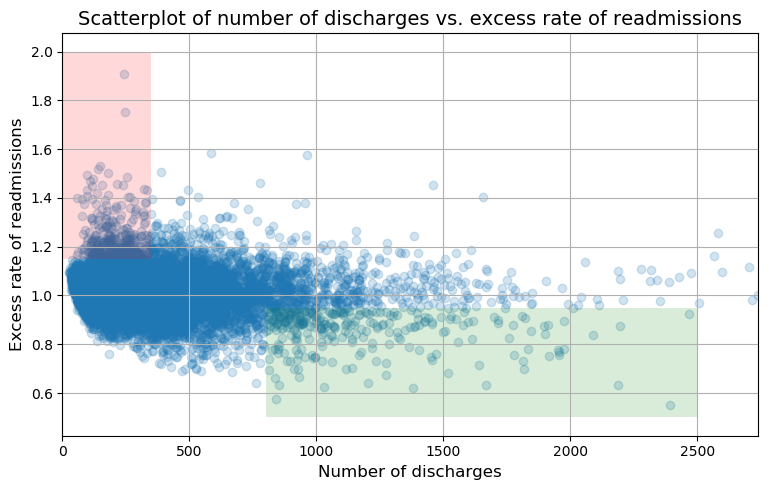

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

This answer will be broken down by each point.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges

It is hard to assess this just from the plot. The density of datapoints at lower discharge rates obscures potential trends. Further, there should be a trend line included in the plot and either a correlation value or test of the slope using appropriate statistics.

+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)

Again, it is hard to assess this because of the density of datapoints at lower discharge rates. There are a subset of datapoints with excess readmission rate, but without knowing the proportion of those relative to non-excessive readmission rates, this statement is unfounded.

+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

This statement again appears to be unfounded. Practically, we are interested in an excess readmission rate <= 1. Therefore, this may be misleading in how it is described for two reasons. (1) There is a large density of readmission rates <= 1 across the range of discharge values. (2) Although there appears to be greater deviation of datapoints below excess readmission rates of 1 than above, the proportion looks similar. 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 

This is impossible to assess because the datapoints are obscured on the plot.

+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

Again, this is hard to assess just from inspecting the plot and without descriptive statistics seems unfounded.

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

There appears to be a correlation, but it is hard to determine the magnitude of it with the plot.

+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

This is predicated on the assumption that smaller discharge rates means the hospital is smaller. While possibly true, there are also scenarios where variables such as daily patient intake and mean hospital stay impact discharge and readmission rate independent of hospital size.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

This seems unfounded as there is no justification for where the cutoff was identified.

+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

Again, this assumes that there is a direct link between hospital size and discharge/readmission rate. As mentioned above, there are likely other variables, and specifically mediator variables, that would need to be thoroughly assessed.

## B.  Provide support for your arguments and your own recommendations with a statistically sound analysis

In this section, the dataset will be more thoroughly explored. We will look at a putative relationship between excess readmission and discharge rate.

In [6]:
# copy original dataframe
data = clean_hospital_read_df.copy()
# display shape of dataset
data.shape

(11578, 12)

In [7]:
data.head(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


The variables of interest are number of discharges and excess readmission rate ratio. Let's first inspect these and run a correlation between them.

In [8]:
# reformat column names to be more pythonic
data.rename(columns={'Number of Discharges' : 'num_discharge', 'Excess Readmission Ratio' : 'er_ratio'}, inplace=True)

In [9]:
data[['num_discharge', 'er_ratio']].describe()

,num_discharge,er_ratio
count,11578.000000,11497.000000
mean,362.909397,1.007504
std,309.176945,0.091964
min,0.000000,0.549500
25%,157.000000,0.952600
50%,280.000000,1.003500
75%,472.750000,1.058100
max,6793.000000,1.909500


We can see from the head of the dataframe that there are some hospitals missing the excess readmission ratio.

In [10]:
data.er_ratio.isna().sum()

81

Because this is a low number relative to the number of hospitals in the dataset, they will be dropped.

In [11]:
data.dropna(subset=['er_ratio'], inplace=True)

In [12]:
data.head(5)

,Hospital Name,Provider Number,State,Measure Name,num_discharge,Footnote,er_ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


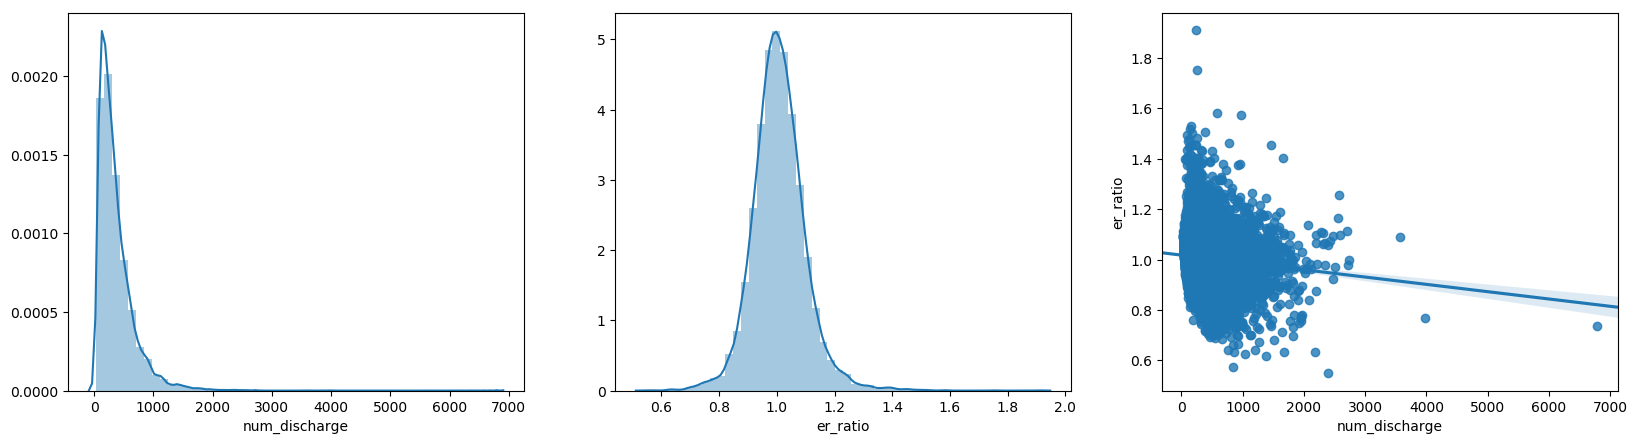

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,5))
sns.distplot(data.num_discharge, ax=ax1)
sns.distplot(data.er_ratio, ax=ax2)
sns.regplot(x='num_discharge', y='er_ratio', data=data, ax=ax3);

Based on the scatterplot, we can see that there does appear to be a negative correlation between number of discharges and excess readmission ratio. However, there also appear to be outliers on both variables. We will remove these from the analysis using a conservative 3 standard deviation cutoff.

In [14]:
# correlation before outlier removal
r, p = stats.pearsonr(data.num_discharge, data.er_ratio)
print(f'The Pearson r value is {round(r, 3)} and the associated p-value is {round(p, 3)}.')

The Pearson r value is -0.097 and the associated p-value is 0.0.


In [15]:
# calculate cutoffs
discharge_cutoff = np.std(data.num_discharge)*3
ratio_cutoff = np.std(data.er_ratio)*3
print(f'The cutoff for number of discharges is +/- {discharge_cutoff} and for excessive readmission ratio is {ratio_cutoff}.')
# filter dataframe
data = data[(np.abs(data.num_discharge - data.num_discharge.mean()) <= discharge_cutoff) & (np.abs(data.er_ratio - data.er_ratio.mean()) <= ratio_cutoff)]

The cutoff for number of discharges is +/- 926.223486691601 and for excessive readmission ratio is 0.2758807993689372.


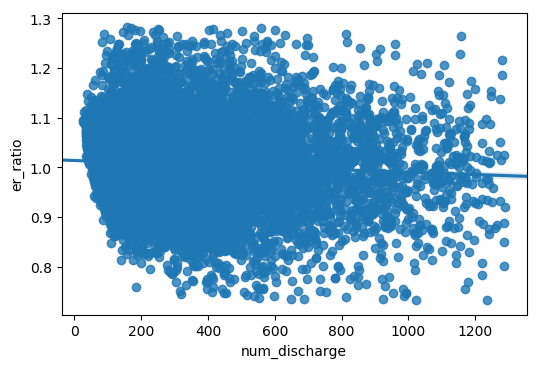

In [16]:
sns.regplot(x='num_discharge', y='er_ratio', data=data);

In [17]:
# correlation after outlier removal
r, p = stats.pearsonr(data.num_discharge, data.er_ratio)
print(f'The Pearson r value is {round(r, 3)} and the associated p-value is {round(p, 3)}.')

The Pearson r value is -0.069 and the associated p-value is 0.0.


Here, we can see that the scatterplot is much more concise with the outliers removed. The correlation remains significant at an alpha of 0.01, although the magnitude of the correlation is very small. This can be explained by the coefficient of determination. This value indicates the amount of variance in a dependent variable explained by a predictor variable.

In [18]:
print(f'The amount of variance in excess readmission ratio explained by number of discharges is {round(r**2, 5)}.')

The amount of variance in excess readmission ratio explained by number of discharges is 0.00474.


## Summary 

Although the correlation between number of discharges and excess readmission ratio was significant, number of discharges explained a very small amount of variance in the ratio. This highlights the difference between statistical and practical significance. The make policy decisions based on the statistical significance of a single test is unwarranted. Here, there are likely many other variables that contribute to the excess readmission ratio that were not modeled given the large amount of unexplained variance. Further, policy decisions such as the ones recommended here should be supported by multiple statistical and practical considerations.

A better way to visualize the data is to include design elements that visualize the density of occurances. The plot below is one example of how to do this.

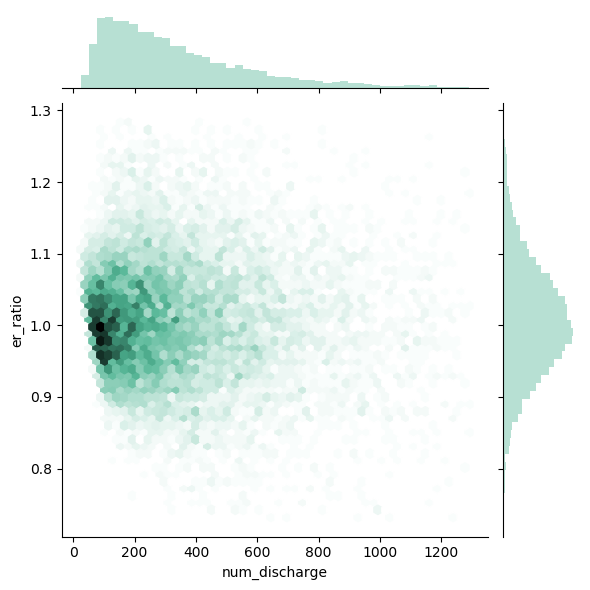

In [19]:
sns.jointplot(data.num_discharge, data.er_ratio, kind='hex', color="#4CB391");